# Simple Linear Regression

import required libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Load Data

In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)
# verify successful load with some randomly selected records
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
161,2014,CADILLAC,ATS AWD,COMPACT,3.6,6,AS6,X,13.1,9.0,11.3,25,260
792,2014,MINI,COOPER S CLUBMAN,SUBCOMPACT,1.6,4,A6,Z,9.3,7.0,8.3,34,191
863,2014,NISSAN,XTERRA 4WD,SUV - SMALL,4.0,6,A5,X,16.1,11.9,14.2,20,327
179,2014,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,Z,17.0,11.8,14.7,19,338
900,2014,PORSCHE,CAYMAN S,TWO-SEATER,3.4,6,M6,Z,11.9,8.6,10.4,27,239



## Understand the data

In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
# select some features to explore more 
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
284,3.6,6,10.9,251
122,4.4,8,14.7,338
1005,5.7,8,15.5,356
1016,2.0,4,9.1,209
278,3.6,6,14.4,230
1023,2.5,5,10.1,232
797,1.6,4,8.5,196
718,2.0,4,10.2,235
949,2.5,4,11.2,258


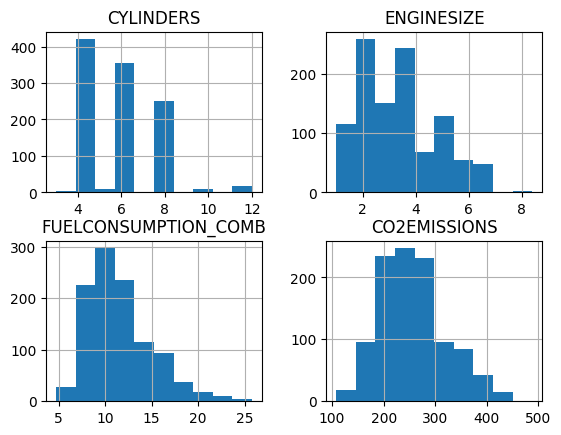

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

As we can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.  
As we might expect, combined fuel consumption and CO2 emission have very similar distributions.  

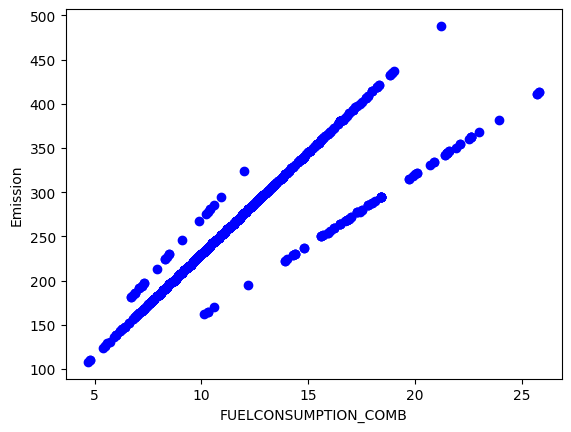

In [9]:
# Now, lets plot each of these features vs the Emission, to see how linear is their relation:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in their slopes.

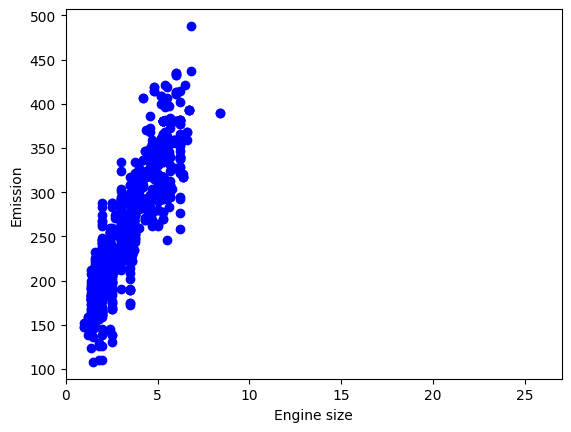

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

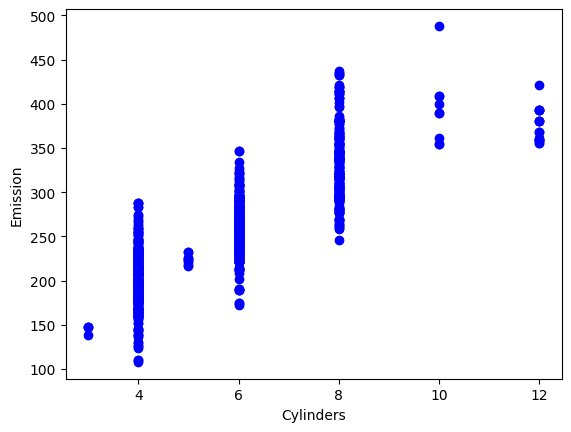

In [11]:
# Plot CYLINDER against CO2 Emission, to see how linear their relationship is.
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

### Extract the input feature and labels from the dataset
Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model. You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.


In [12]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [13]:
# Create train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

### Build a simple linear regression model
You'll use scikit-learn to build your model as follows. See [Scikit-Learn Linear Regression documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn all about the linear model predictor object.

In [15]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

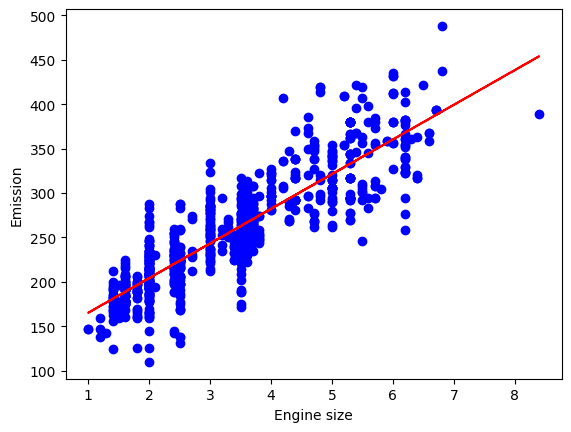

In [16]:
# Visualize model outputs
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [17]:
# Model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict( X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_test))
print("Root mean squared error: %.2f" % root_mean_squared_error(y_test_, y_test))
print("R2-score: %.2f" % r2_score( y_test_, y_test) )

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.68


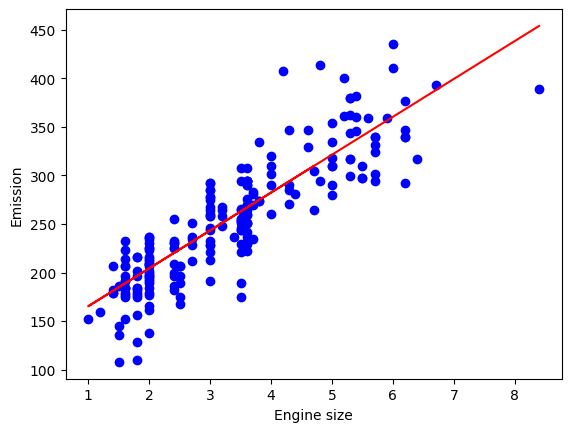

In [ ]:
# Plot the regression model result over the test data instead of the training data. 
# Visually evaluate whether the result is good.
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")  
plt.show()

Let's see the evaluation metrics if you train a regression model using the `FUELCONSUMPTION_COMB` feature.

#### Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets. 
Use the same random state as previously so you can make an objective comparison to the previous training result.

In [19]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#### Train a linear regression model using the training data you created.
Remember to transform your 1D feature into a 2D array. 

In [20]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

#### Use the model to make test predictions on the fuel consumption testing data.

In [21]:
y_test_ = regr.predict(X_test.reshape(-1,1))

#### Calculate and print the Mean Squared Error of the test predictions.

In [22]:
print("Mean absolute error: %.2f" % mean_absolute_error(y_test_, y_test))

Mean absolute error: 20.44


# Multiple Linear Regression

In [24]:
# Let's select a few features to work with that might be predictive of CO2 emissions. 
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [25]:
# Drop categoricals and any unseless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

In [27]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [28]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [29]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


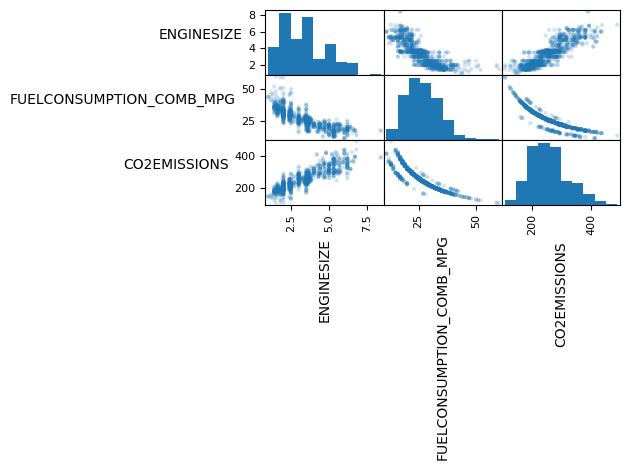

In [ ]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

### Extract the input features and labels from the data set
Extract the required columns and convert the resulting dataframes to NumPy arrays.


In [33]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

In [34]:
# Process selected features
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [35]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [37]:
# Create train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [ ]:
# Build multiple linear regression model
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [ ]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


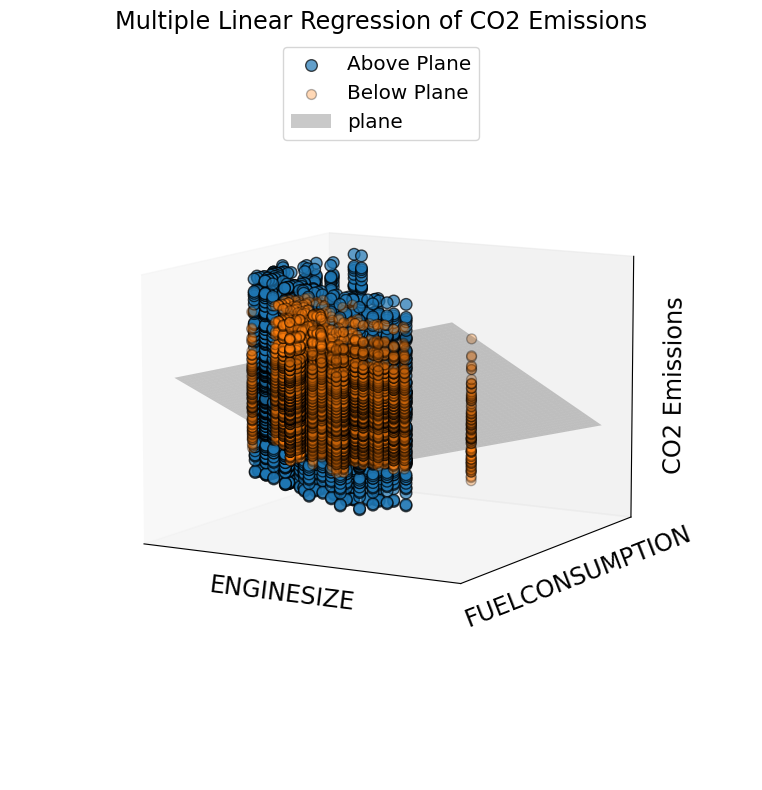

In [40]:
# Visualize model outputs
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

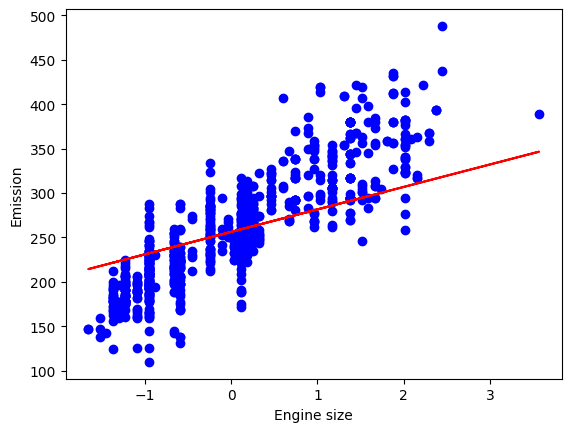

In [41]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

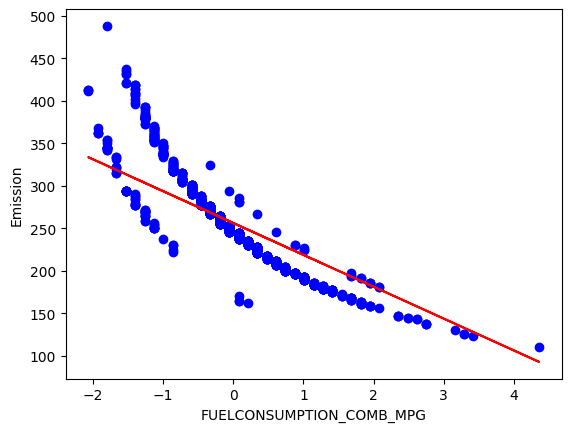

In [42]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

In [44]:
# Determine and print the parameters for the best-fit linear regression line 
# for CO2 emission with respect to engine size.
X_train_1 = X_train[:,0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)
coef_1 =  regressor_1.coef_
intercept_1 = regressor_1.intercept_

print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)


Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


Text(0, 0.5, 'Emission')

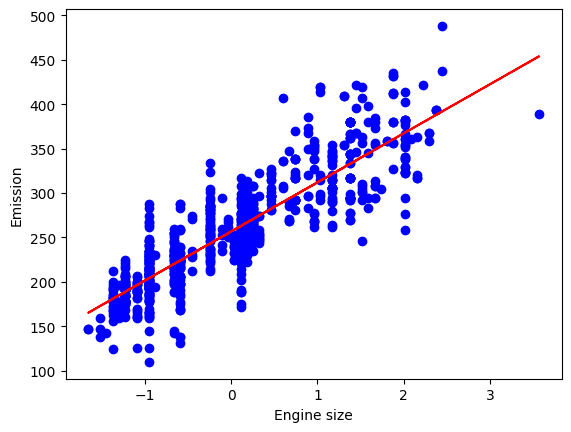

In [ ]:
# Produce a scatterplot of CO2 emission against ENGINESIZE and 
# include the best-fit regression line to the training data.  
plt.scatter(X_train_1, y_train, color='blue')
plt.plot(X_train_1, coef_1[0,0] * X_train_1 + intercept_1[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

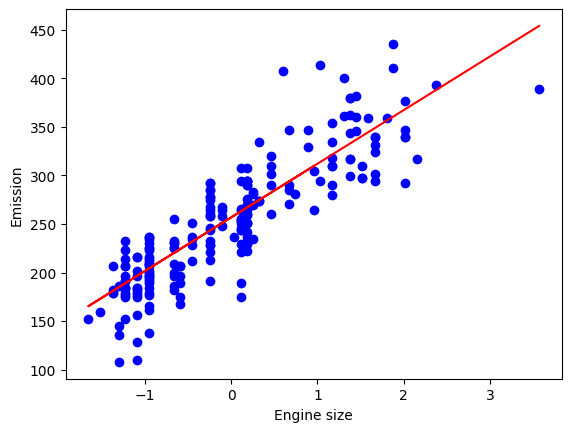

In [ ]:
# Generate the same scatterplot and best-fit regression line, but now base the result on the test data set. 
# Consider how the test result compares to the training result.

X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test, color='blue')
plt.plot(X_test_1, coef_1[0,0] * X_test_1 + intercept_1[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [47]:
# Repeat the same modeling but use FUELCONSUMPTION_COMB_MPG as the independent variable instead. Display the model coefficients including the intercept.
X_train_2 = X_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1, 1), y_train)
coef_2 =  regressor_2.coef_ 
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


Text(0, 0.5, 'CO2 Emission')

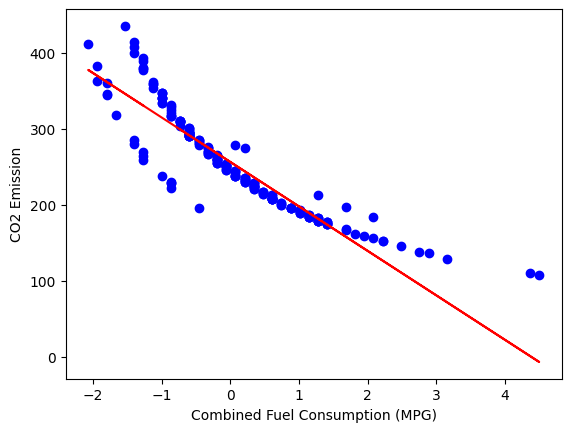

In [48]:
# Generate a scatter plot showing the results as before on the test data.
# Consider  well the model fits, and what you might be able to do to improve it. 
X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test, color='blue')
plt.plot(X_test_2, coef_2[0,0] * X_test_2 + intercept_2[0], '-r')
plt.xlabel("Combined Fuel Consumption (MPG)")
plt.ylabel("CO2 Emission")

# Logistic Regression with Python

In [ ]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

In [1]:
# import required libraries:

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Classification with Logistic Regression

###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.
'

### About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 
<br><br>
This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.


In [2]:
# Load Data from URL

# churn_df = pd.read_csv("ChurnData.csv")
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


## Data Preprocessing


For this lab, we can use a subset of the fields available to develop out model. Let us assume that the fields we use are 'tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip' and of course 'churn'.

In [3]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


For modeling the input fields X and the target field y need to be fixed. Since that the target to be predicted is 'churn', the data under this field will be stored under the variable 'y'. We may use any combination or all of the remaining fields as the input. Store these values in the variable 'X'.

In [4]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]  #print the first 5 values

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [5]:
y = np.asarray(churn_df['churn'])
y[0:5] #print the first 5 values

array([1, 1, 0, 0, 0])

It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of StandardScalar function in the Scikit-Learn library.


In [6]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Splitting the dataset

The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training. For this, we may make use of the train_test_split function in the scikit-learn library.

In [7]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier modeling

Let's build the model using __LogisticRegression__ from the Scikit-learn package and fit our model with train data set.

In [8]:
LR = LogisticRegression().fit(X_train,y_train)

Fitting, or in simple terms training, gives us a model that has now learnt from the traning data and can be used to predict the output variable. Let us predict the churn parameter for the test data set.


In [9]:
yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

To understand this prediction, we can also have a look at the prediction probability of data point of the test data set. Use the function __predict_proba__ , we can get the probability of each class. The first column is the probability of the record belonging to class 0, and second column that of class 1. Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

Since the purpose here is to predict the 1 class more acccurately, you can also examine what role each input feature has to play in the prediction of the 1 class. Consider the code below.

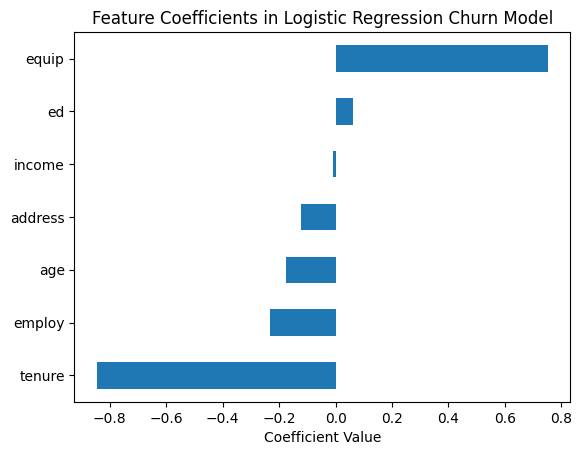

In [11]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.  


## Performance Evaluation

Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. Let us evaluate the log-loss value.

### log loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. The lower the log loss value, the better the model is considered to be.

In [12]:
log_loss(y_test, yhat_prob)

0.6257718410257235